In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df=pd.read_csv("EDA_data.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,r_yn,spark_yn,aws_yn,excel_yn,job_simple,seniortiy,desc_len,num_of_Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,49,1,0,0,0,1,data scientist,na,2555,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,38,1,0,0,0,0,data scientist,na,4828,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,12,1,0,1,0,1,data scientist,na,3495,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,57,1,0,0,0,0,data scientist,na,3926,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,24,1,0,0,0,1,data scientist,na,2748,3


In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company_Text', 'job_state', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simple', 'seniortiy', 'desc_len',
       'num_of_Competitors'],
      dtype='object')

In [19]:
df_model=df[["avg_salary","Rating","Size","Type of ownership","Industry","Sector","Revenue","num_of_Competitors","hourly","employer_provided","job_state","same_state","age","python_yn","spark_yn","aws_yn","excel_yn","job_simple","seniortiy","desc_len"]]

In [20]:
df_dum=pd.get_dummies(df_model)

In [21]:
df_dum

,avg_salary,Rating,num_of_Competitors,hourly,employer_provided,same_state,age,python_yn,spark_yn,aws_yn,...,job_simple_analyst,job_simple_data engineer,job_simple_data scientist,job_simple_director,job_simple_manager,job_simple_mle,job_simple_na,seniortiy_jr,seniortiy_na,seniortiy_senior
0,72.0,3.8,0,0,0,0,49,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,38,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,12,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,57,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,24,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,3,0,0,0,192,0,0,1,...,0,0,0,0,0,0,1,0,0,1
738,102.5,4.4,3,0,0,0,16,1,1,1,...,0,1,0,0,0,0,0,0,0,1
739,73.5,2.6,0,0,0,1,38,0,0,0,...,0,0,0,0,0,0,1,0,1,0
740,127.5,3.2,0,0,0,0,-1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X=df_dum.drop("avg_salary",axis=1)
y=df_dum.avg_salary.values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
import statsmodels.api as sm

In [25]:
X_sm=X=sm.add_constant(X)

In [26]:
X_sm

,const,Rating,num_of_Competitors,hourly,employer_provided,same_state,age,python_yn,spark_yn,aws_yn,...,job_simple_analyst,job_simple_data engineer,job_simple_data scientist,job_simple_director,job_simple_manager,job_simple_mle,job_simple_na,seniortiy_jr,seniortiy_na,seniortiy_senior
0,1.0,3.8,0,0,0,0,49,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1.0,3.4,0,0,0,0,38,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1.0,4.8,0,0,0,1,12,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1.0,3.8,3,0,0,1,57,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1.0,2.9,3,0,0,1,24,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,1.0,3.9,3,0,0,0,192,0,0,1,...,0,0,0,0,0,0,1,0,0,1
738,1.0,4.4,3,0,0,0,16,1,1,1,...,0,1,0,0,0,0,0,0,0,1
739,1.0,2.6,0,0,0,1,38,0,0,0,...,0,0,0,0,0,0,1,0,1,0
740,1.0,3.2,0,0,0,0,-1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [27]:
model=sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           1.48e-94
Time:                        11:37:33   Log-Likelihood:                -3311.7
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6093      6.722      6.488      0.000      30.408      56.810
Rating                                                3.6054      1.937      1.861      0.063      -0.200       7.410
num_of_Competitors                                    2.2508      0.868      2.593      0.010       0.546       3.956
hourly                                              -36.5759      9.173     -3.987      0.000     -54.591     -18.561
employer_provided                                    31.3665     11.525      2.722      0.007       8.733      54.000
same_state                                            2.4828      2.619      0.948      0.343      -2.660       7.625
age                                                   0.0349      0.030      1.164      0.245      -0.024       0.094
python_yn                                             8.1367      2.523      3.224      0.001       3.181      13.093
spark_yn                                             -0.5710      2.921     -0.196      0.845      -6.307       5.165
aws_yn                                                1.1222      2.736      0.410      0.682      -4.251       6.495
excel_yn                                             -0.4030      2.268     -0.178      0.859      -4.856       4.051
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6166      8.629      1.578      0.115      -3.331      30.564
Size_1 to 50 employees                                1.1088      6.501      0.171      0.865     -11.658      13.876
Size_10000+ employees                                -2.8969      5.800     -0.499      0.618     -14.288       8.494
Size_1001 to 5000 employees                           6.1269      3.880      1.579      0.115      -1.493      13.746
Size_201 to 500 employees                             2.2464      3.873      0.580      0.562      -5.360       9.852
Size_5001 to 10000 employees                         -3.8765      5.443     -0.712      0.477     -14.565       6.812
Size_501 to 1000 employees                            2.1686      4.059      0.534      0.593      -5.804      10.141
Size_51 to 200 employees                              4.1874      4.422      0.947      0.344      -4.496      12.871
Size_Unknown                                         20.9281     13.993      1.496      0.135      -6.553      48.409
Type of ownership_-1                                 13.6166      8.629      1.578      0.115      -3.331      30.564
Type of ownership_College / University                6.4586     17.738      0.364      0.716     -28.377      41.294
Type of ownersh

In [35]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score

In [29]:
lm=LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression()

In [34]:
np.mean(cross_val_score(lm,X_train,y_train,scoring="neg_mean_absolute_error",cv=3))

-52887699.56378735

In [57]:
lm_l=Lasso()
lm_l.fit(X_train,y_train)

Lasso()

In [37]:
np.mean(cross_val_score(lm_l,X_train,y_train,scoring="neg_mean_absolute_error",cv=3))

-21.095732792689095

In [44]:
alpha=[]
error=[]
for i in range(1,100):
    alpha.append(i/100)
    lml=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train,scoring="neg_mean_absolute_error",cv=3)))

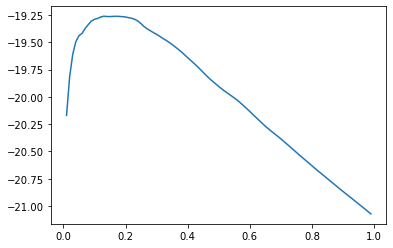

In [45]:
plt.plot(alpha,error)

In [46]:
err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err,columns=["alpha","error"])
df_err[df_err.error==max(df_err.error)]

,alpha,error
12,0.13,-19.260826


In [47]:
df_err

,alpha,error
0,0.01,-20.169555
1,0.02,-19.815133
2,0.03,-19.608986
3,0.04,-19.492526
4,0.05,-19.439311
...,...,...
94,0.95,-20.980259
95,0.96,-21.003256
96,0.97,-21.026254
97,0.98,-21.049372


In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf=RandomForestRegressor()
cross_val_score(rf,X_train,y_train,scoring="neg_mean_absolute_error",cv=3)

array([-16.42558081, -14.91512626, -13.98444162])

In [50]:
np.mean(cross_val_score(rf,X_train,y_train,scoring="neg_mean_absolute_error",cv=3))

-14.957645234066554

In [51]:
from sklearn.model_selection import GridSearchCV

In [53]:
param={"n_estimators":range(10,100,10),
      "criterion":("mse","mae"),
       "max_features":("auto","sqrt","log2")}
gs=GridSearchCV(rf,param_grid=param,scoring="neg_mean_absolute_error",cv=3)

In [54]:
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 100, 10)},
             scoring='neg_mean_absolute_error')

In [55]:
gs.best_score_

-14.902565013739576

In [56]:
gs.best_params_

{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 90}

In [60]:
ypred_lm=lm.predict(X_test)
ypred_lml=lm_l.predict(X_test)
ypred_rf=gs.best_estimator_.predict(X_test)

In [61]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,ypred_lm))
print(mean_absolute_error(y_test,ypred_lml))
print(mean_absolute_error(y_test,ypred_rf))

213729417.05647743
23.332934525650884
11.285197613721104


#### Random forest en iyi model çıktı